In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.9 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [ ]:
ims = search_images_ddg('ferrari car')
len(ims)

200

In [ ]:
dest = 'images/ferrari.jpg'
download_url(ims[0], dest, show_progress=False)

Path('images/ferrari.jpg')

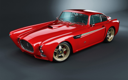

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
car_types = 'ferrari','mercedes','mclaren'
path = Path('cars')

In [ ]:
if not path.exists():
  path.mkdir()
  for o in car_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} car')
    download_images(dest, urls=results)

In [ ]:
fns = get_image_files(path)
fns

(#576) [Path('cars/mercedes/1fdbe46b-bd3f-430f-a009-1567f54932e5.png'),Path('cars/mercedes/2afbc908-c68b-4d2a-9486-eb28c9bc1e56.jpg'),Path('cars/mercedes/ec88d410-7f2b-44ee-bbbc-9f0f766db3ea.jpg'),Path('cars/mercedes/42c8f4fb-281d-46aa-80e3-f85a2a33db80.jpg'),Path('cars/mercedes/b7386e64-559d-462a-b491-050405b51c5d.jpg'),Path('cars/mercedes/92718562-2028-4f55-bf5f-6d3a422e2715.jpg'),Path('cars/mercedes/e0794d6b-4c01-4f6f-b5bb-e8562cdca88d.jpg'),Path('cars/mercedes/1307034c-d2f5-4f4b-8f8e-14f809af6e94.jpg'),Path('cars/mercedes/b4ea7606-7424-4b0a-afa2-227aa786bba6.jpg'),Path('cars/mercedes/878ae8d3-e2b6-40de-8059-c88d98f6c119.png')...]

In [ ]:
failed = verify_images(fns)
failed

(#16) [Path('cars/mercedes/1307034c-d2f5-4f4b-8f8e-14f809af6e94.jpg'),Path('cars/mercedes/9e9aceb1-0309-48e5-bf12-204805576816.jpg'),Path('cars/mercedes/adeffb34-a651-4bcf-9363-dea69052db78.jpg'),Path('cars/mercedes/412c1e38-f1fa-43b2-b2fc-e98d9d2fa239.jpeg'),Path('cars/mercedes/991071a7-8576-4bc8-b78f-94c8b279f893.jpg'),Path('cars/mercedes/4dcb1371-f99b-4ea6-a4f4-eedafa1ec35a.jpg'),Path('cars/mercedes/f5eff6d7-8285-47db-87ae-de9602caae5c.jpg'),Path('cars/mclaren/6f389fda-379b-469e-9a8d-73246ab078ce.jpg'),Path('cars/mclaren/9fbbfd5d-a42a-4e3e-b8bd-dce3469bbef0.jpg'),Path('cars/mclaren/5c3b12af-5609-4bee-a796-64c61b36d9f6.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#16) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
dls = cars.dataloaders(path)

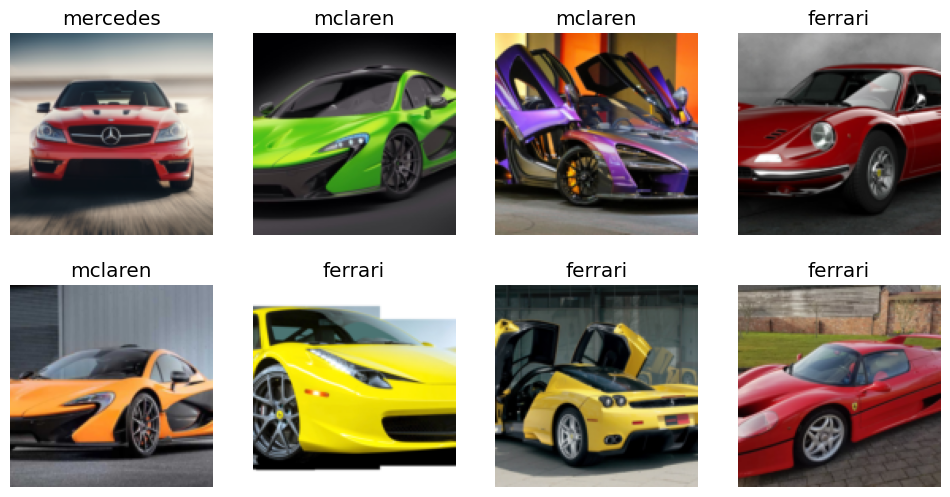

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

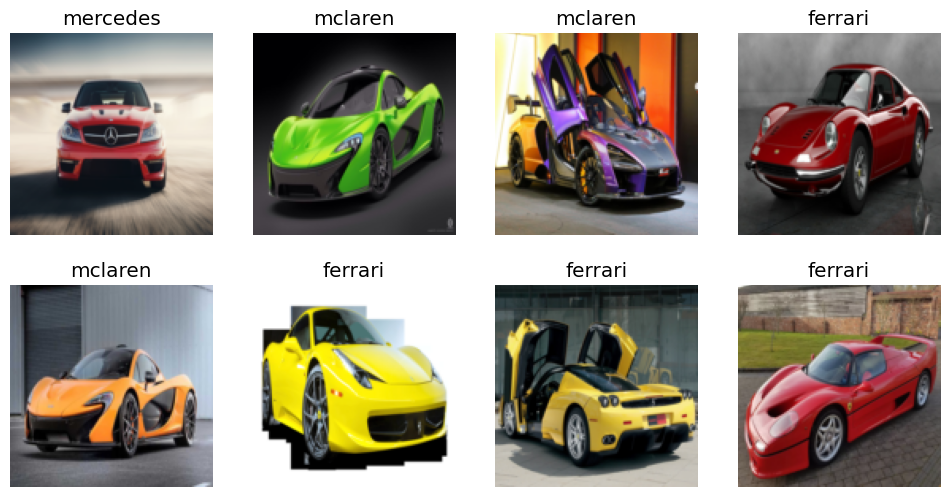

In [ ]:
cars = cars.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

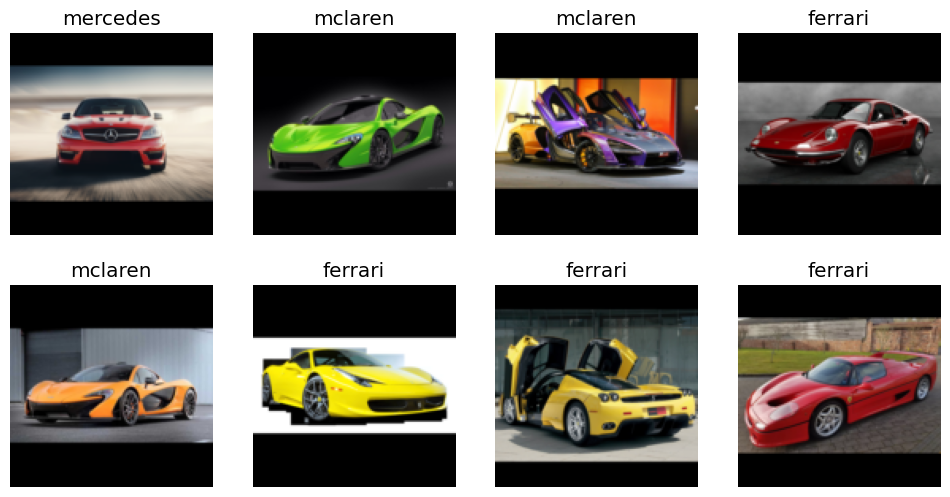

In [ ]:
cars = cars.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

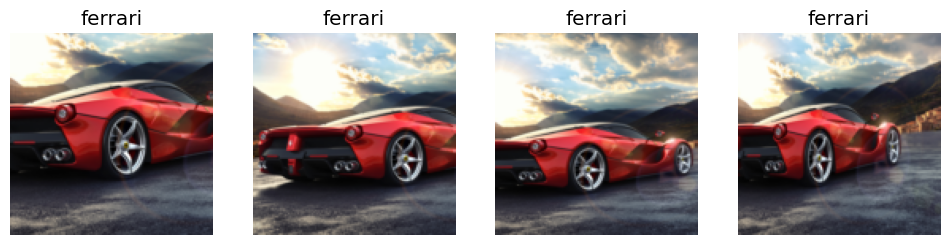

In [ ]:
cars = cars.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

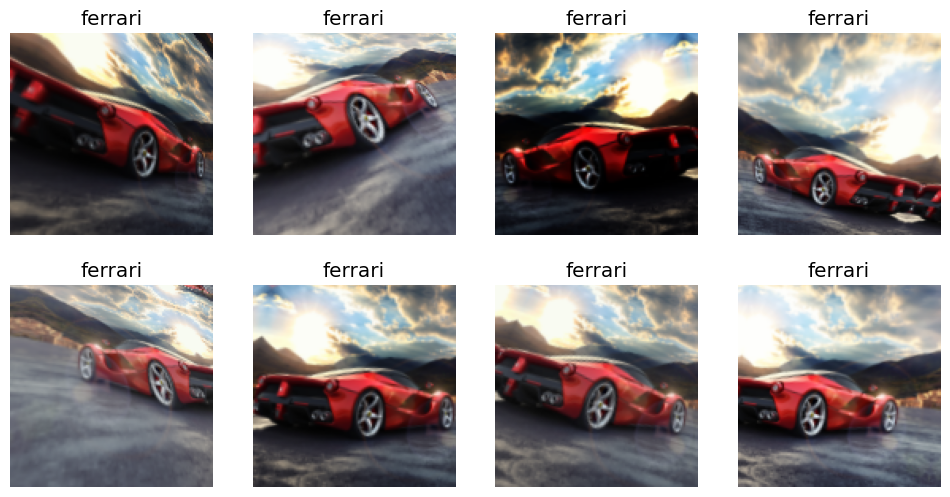

In [ ]:
cars = cars.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls=cars.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
cars = cars.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = cars.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 62.4MB/s]


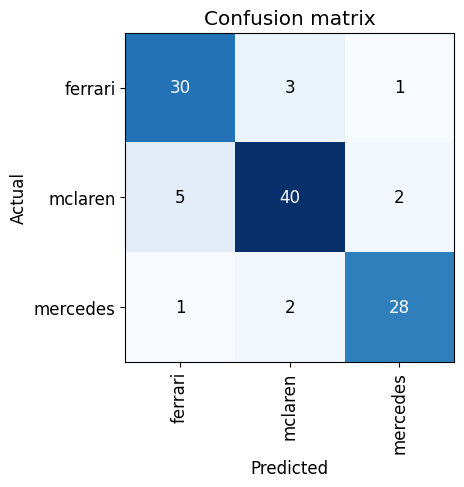

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

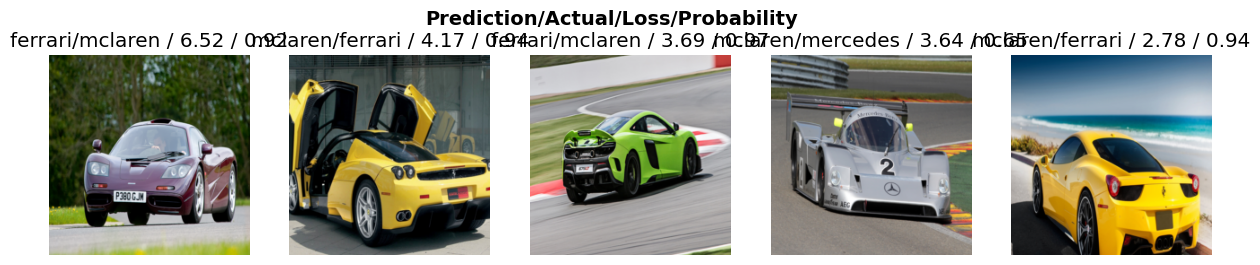

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkt')

(#0) []

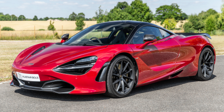

In [ ]:
img = Image.open('/content/redmclaren.jpeg')
img.to_thumb(224,224)

In [ ]:
learn.predict(img)

('mclaren', tensor(1), tensor([0.1850, 0.8091, 0.0059]))

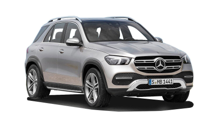

In [ ]:
img = Image.open('/content/silvbenz.jpeg')
img.to_thumb(224,224)

In [ ]:
learn.predict(img)

('mercedes', tensor(2), tensor([1.0242e-06, 2.9475e-06, 1.0000e+00]))